In [92]:
import csv
import math 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
def CsvLoader(filename):
    lines=csv.reader(open(r'C:\Users\RAHUL K R\Desktop\diabetes.csv'))
    dataset=list(lines)
    for i in range (len(dataset)):
        dataset[i]=[float(x)for x in dataset[i]]
    return dataset

In [156]:
data=pd.read_csv('diabetes.csv')
data.head(10)
#data["Outcome"].hist()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<AxesSubplot:>

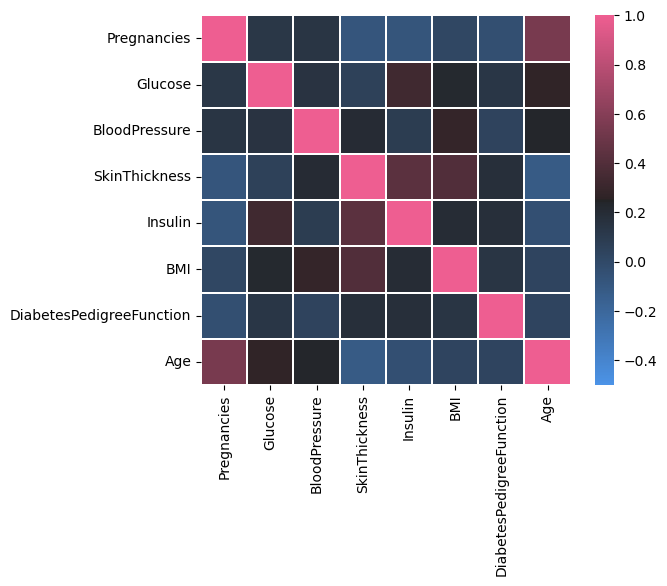

In [157]:
corr = data.iloc[:,:-1].corr(method='pearson')
cmap= sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=-0.5,cmap=cmap,square=True,linewidths=0.2)

In [158]:
data=data[["Glucose","Age","BMI","BloodPressure","Outcome"]]
data.head(10)

,Glucose,Age,BMI,BloodPressure,Outcome
0,148,50,33.6,72,1
1,85,31,26.6,66,0
2,183,32,23.3,64,1
3,89,21,28.1,66,0
4,137,33,43.1,40,1
5,116,30,25.6,74,0
6,78,26,31.0,50,1
7,115,29,35.3,0,0
8,197,53,30.5,70,1
9,125,54,0.0,96,1


<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

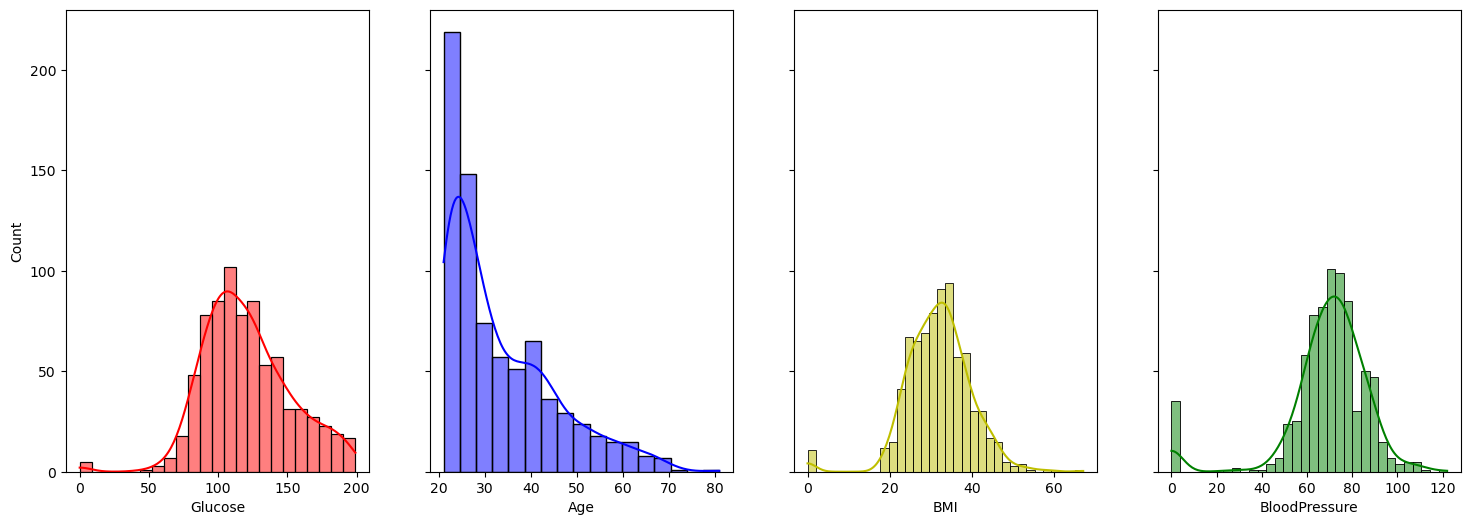

In [159]:
fig,axes=plt.subplots(1,4,figsize=(18,6),sharey=True)
sns.histplot(data,ax=axes[0],x="Glucose",kde=True,color='r')
sns.histplot(data,ax=axes[1],x="Age",kde=True,color='b')
sns.histplot(data,ax=axes[2],x="BMI",kde=True,color='y')
sns.histplot(data,ax=axes[3],x="BloodPressure",kde=True,color='g')

eliminating the age to fit the normal distribution

In [98]:

data=data[["Glucose","BMI","BloodPressure","Outcome"]]
data.head(10)
def prior_f(data,y):
    classes=sorted(list(data[y].unique()))#unique avoids repeation
    prior=[]
    for i in classes:
        prior.append(len(data[data[y]==i])/len(data))
    return prior


In [160]:
def calc_gaussian(data,feat_name,feat_value,y,label):
    feat=list(data.columns)
    data=data[data[y]==label]
    mean,std=data[feat_name].mean(),data[feat_name].std()
    p_xgiven_y=(1/(np.sqrt(2*np.pi)*std))*np.exp(-((feat_value-mean)**2/(2*std**2)))
    return p_xgiven_y

target=data["Outcome"]
data.drop(["Outcome","Age"],axis='columns',inplace=True)
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Another Appraoch From Sklearn

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.3)#20
len(X_train)
len(X_test)
y_train

693    1
599    0
50     0
131    1
767    0
      ..
329    0
362    0
232    0
450    0
595    1
Name: Outcome, Length: 537, dtype: int64

In [162]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7748917748917749

In [163]:
y_test[:10]

193    1
92     0
553    0
220    1
146    0
521    0
384    0
101    0
134    0
756    0
Name: Outcome, dtype: int64

In [164]:
model.predict(X_test[:10])

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [165]:
model.predict_proba(X_test[:10])#first column is for 0 

array([[0.12637167, 0.87362833],
       [0.74716231, 0.25283769],
       [0.92838433, 0.07161567],
       [0.13037777, 0.86962223],
       [0.95281773, 0.04718227],
       [0.673227  , 0.326773  ],
       [0.82226809, 0.17773191],
       [0.55923636, 0.44076364],
       [0.94949974, 0.05050026],
       [0.51677252, 0.48322748]])